<font size=5>
    First-order data exploration: target quantity
</font>

<hr style="border: solid rgb(0,0,0) 0.0px; background-color: rgb(0,0,0);height: 2.0px;"/>
<font size=4>
    Summary: 
</font>

1. target quantity distribution
    * slightly symmetric about median, except for the tail
    * taking data within the 95% range or the 1.5$\cdot$IQR range could help
2. possible outlier samples for low values
    * e.g. gov't housing, or some enforced sales cap.
    * **ToDo** for this subset, check for unusual correlation among the features
        * then eliminate as needed when a given sample fits the commom features for the outliers

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

## Load the data

In [ ]:
dataset_dir = os.path.abspath('../../../../data/')

In [5]:
df = pd.read_csv(dataset_dir + 'train.csv', \
                 infer_datetime_format=True, parse_dates=['timestamp'])

In [6]:
df.price_doc.describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

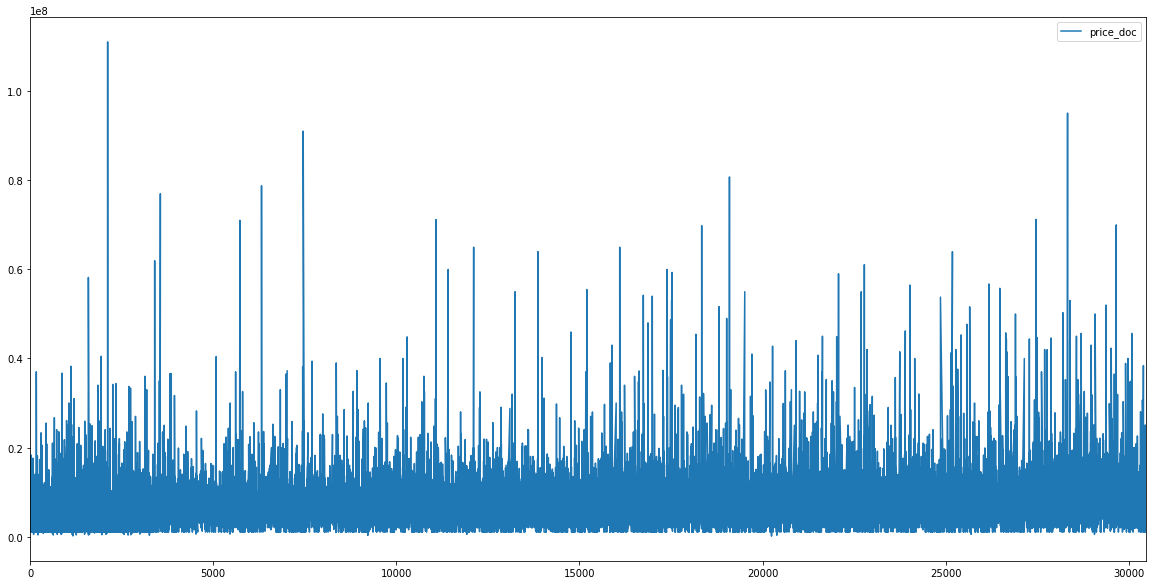

In [7]:
fig, ax = plt.subplots(1,1, figsize=[20,10])
df.sort_values('timestamp')[['price_doc']].plot(ax=ax)

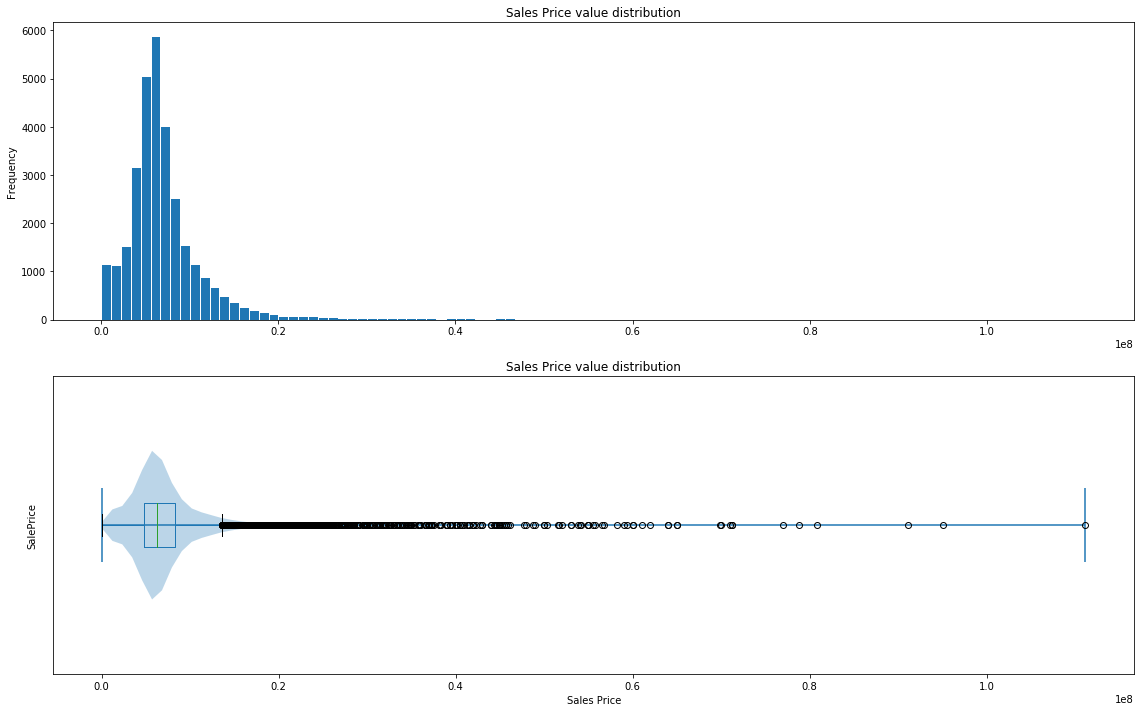

In [9]:
fig, ax = plt.subplots(2,1,figsize=(16,10))

df.price_doc.plot(kind="hist", bins=100, rwidth=0.9, ax=ax[0])
ax[0].set_title("Sales Price value distribution")
plt.xlabel("Sales Price")

ax[1].violinplot(df.sort_values('timestamp')[['price_doc']].values, vert=False)
df.price_doc.plot(kind="box", vert=False, ax=ax[1])
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.yticks([0], [''])
plt.ylabel("SalePrice\n", rotation=90)
plt.tight_layout()


In [11]:
df.price_doc.describe(percentiles=[0.025, 0.975])

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
2.5%     1.000000e+06
50%      6.274411e+06
97.5%    1.782272e+07
max      1.111111e+08
Name: price_doc, dtype: float64

In [13]:
min_and_max_95 = np.quantile(df.price_doc.values, [0.025, 0.975])

In [28]:
df_sub = df[(df['price_doc']>=min_and_max_95[0])\
           & (df['price_doc']<min_and_max_95[1])]

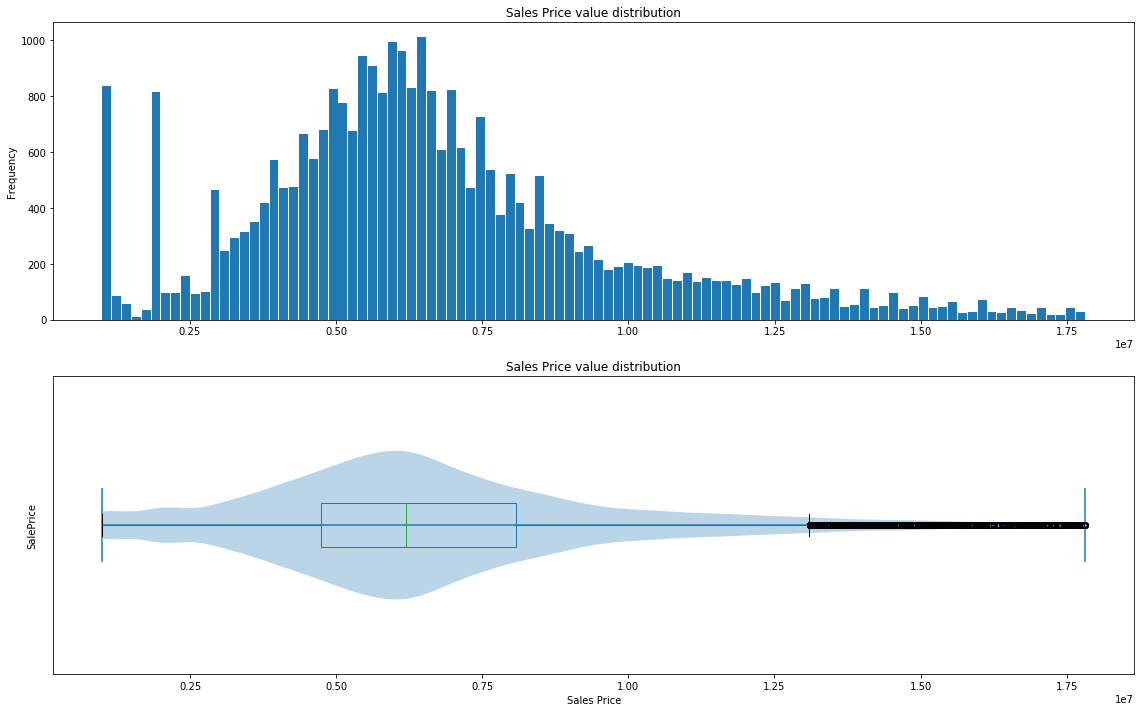

In [29]:
fig, ax = plt.subplots(2,1,figsize=(16,10))

df_sub.price_doc.plot(kind="hist", bins=100, rwidth=0.9, ax=ax[0])
ax[0].set_title("Sales Price value distribution")
plt.xlabel("Sales Price")

ax[1].violinplot(df_sub.sort_values('timestamp')[['price_doc']].values, vert=False)
df_sub.price_doc.plot(kind="box", vert=False, ax=ax[1])
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.yticks([0], [''])
plt.ylabel("SalePrice\n", rotation=90)
plt.tight_layout()


**Notes**

1. skewed distribution with long tail
2. slightly symmetric about median, except for the tail
3. two larger bins for low values
    * seems like these should be outliers, _e.g._ gov't housing, or some enforced sales cap.
    * **ToDo** for this subset, check for unusual correlation among the features
        * then eliminate as needed when a given sample fits the commom features for the outliers

In [30]:
q1, q3 = np.quantile(df.price_doc.values, [0.25, 0.75]).tolist()

In [32]:
print(q1,q3)

4740002.0 8300000.0


In [38]:
iqr = q3-q1

In [39]:
df_iqr = df[(df['price_doc']>=q1-1.5*iqr)\
           &(df['price_doc']< q3+1.5*iqr)]

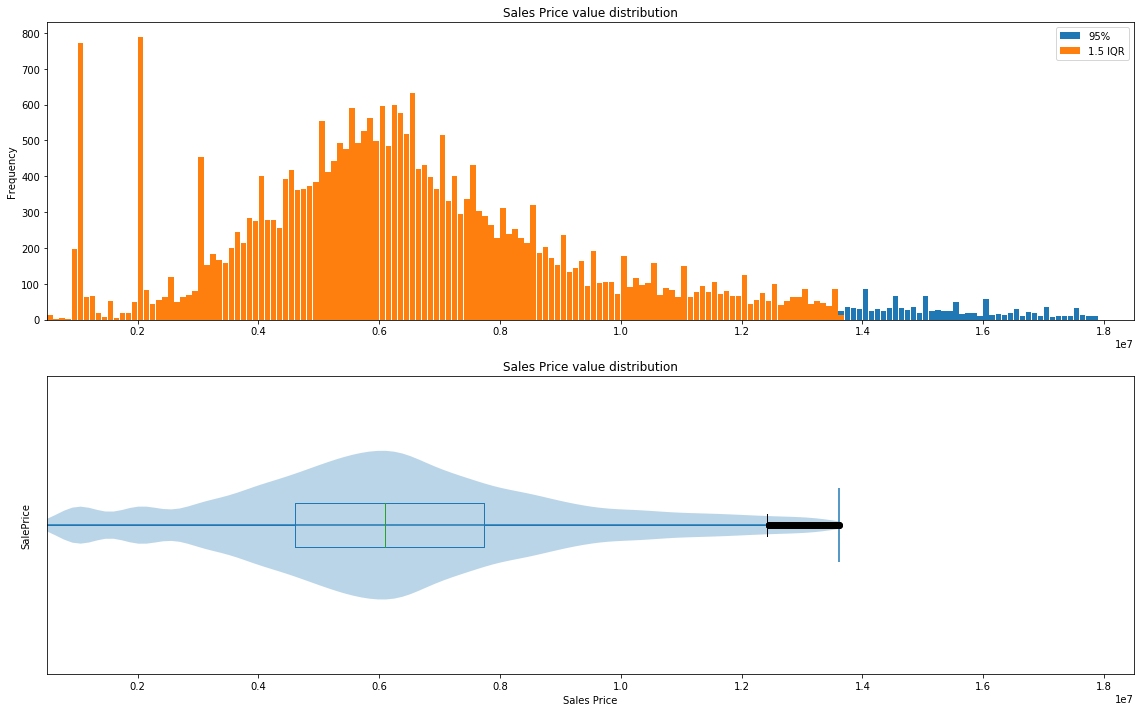

In [55]:
fig, ax = plt.subplots(2,1,figsize=(16,10))

bins = np.arange(5e5,1.85e7,1e5)

df_sub.price_doc.plot(kind="hist", bins=bins, rwidth=0.9, ax=ax[0],label='95%')
df_iqr.price_doc.plot(kind="hist", bins=bins, rwidth=0.9, ax=ax[0],label='1.5 IQR')
ax[0].set_title("Sales Price value distribution")
ax[0].legend()
ax[0].set_xlim([5e5,1.85e7])
plt.xlabel("Sales Price")

ax[1].violinplot(df_iqr.sort_values('timestamp')[['price_doc']].values, vert=False)
df_iqr.price_doc.plot(kind="box", vert=False, ax=ax[1])
plt.title("Sales Price value distribution")
plt.xlabel("Sales Price")
plt.yticks([0], [''])
plt.ylabel("SalePrice\n", rotation=90)
ax[1].set_xlim([5e5,1.85e7])
plt.tight_layout()

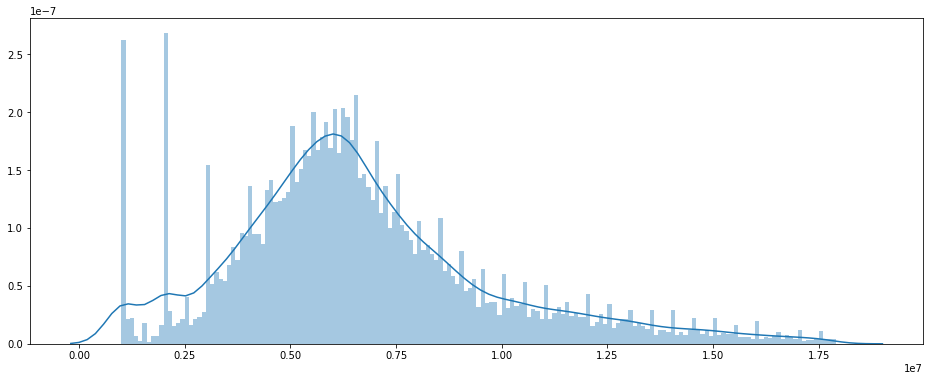

In [57]:
fig, ax = plt.subplots(1,1,figsize=(16,6))

sns.distplot(df_sub.price_doc.values, bins=bins,ax=ax)